#  Assignment - 5 Multiple linear regression

# Question -  Toyota corolla

# Import necessary data

In [47]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# Import data

In [48]:
toyota = pd.read_csv(r'D:\Downloads\Toyotacorolla.csv',encoding='windows-1252')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [49]:
toyota = pd.DataFrame(toyota)

In [50]:
toyota1 = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Data understanding

In [51]:
toyota1.shape

(1436, 9)

In [52]:
toyota1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [53]:
toyota1.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

## Linearity test 

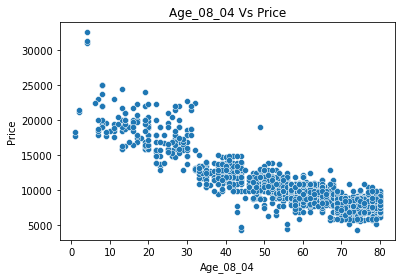

In [54]:
sns.scatterplot( x = 'Age_08_04' , y = 'Price' ,data = toyota1)
plt.title('Age_08_04 Vs Price')
plt.show()

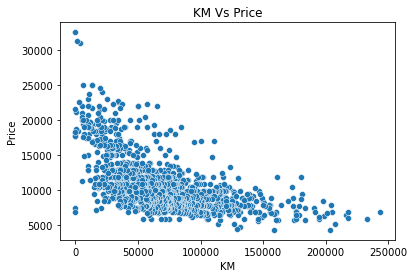

In [55]:
sns.scatterplot( x = 'KM' , y = 'Price' ,data = toyota1)
plt.title('KM Vs Price')
plt.show()

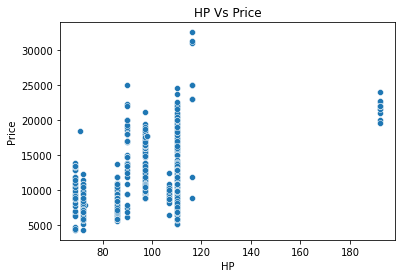

In [56]:
sns.scatterplot( x = 'HP' , y = 'Price' ,data = toyota1)
plt.title('HP Vs Price')
plt.show()

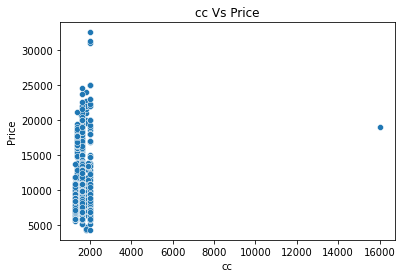

In [57]:
sns.scatterplot( x = 'cc' , y = 'Price' ,data = toyota1)
plt.title('cc Vs Price')
plt.show()

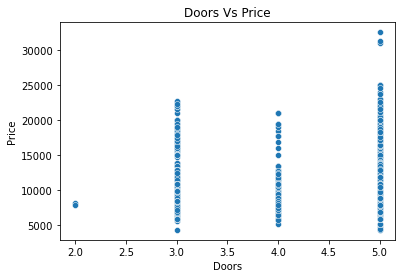

In [58]:
sns.scatterplot( x = 'Doors' , y = 'Price' ,data = toyota1)
plt.title('Doors Vs Price')
plt.show()

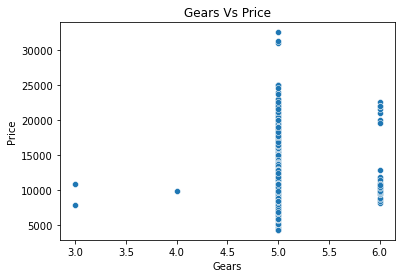

In [59]:
sns.scatterplot( x = 'Gears' , y = 'Price' ,data = toyota1)
plt.title('Gears Vs Price')
plt.show()

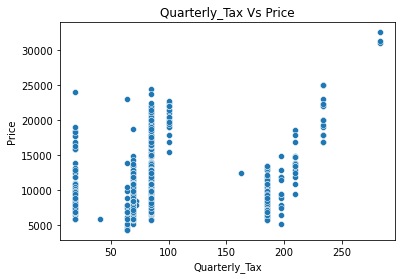

In [60]:
sns.scatterplot( x = 'Quarterly_Tax' , y = 'Price' ,data = toyota1)
plt.title('Quarterly_Tax Vs Price')
plt.show()

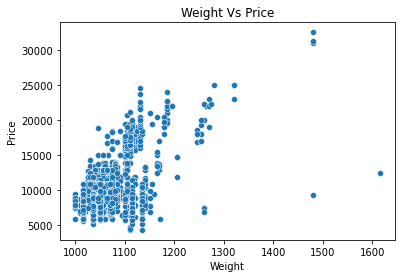

In [61]:
sns.scatterplot( x = 'Weight' , y = 'Price' ,data = toyota1)
plt.title('Weight Vs Price')
plt.show()

## With linear line

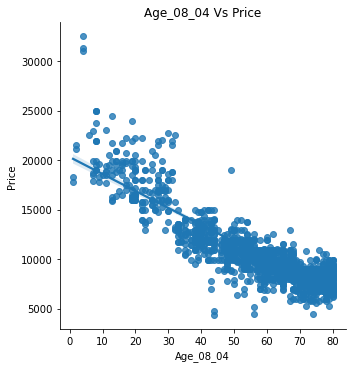

In [62]:
sns.lmplot( x = 'Age_08_04' , y = 'Price' ,data = toyota1)
plt.title('Age_08_04 Vs Price')
plt.show()

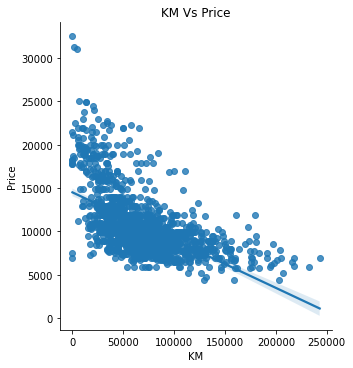

In [63]:
sns.lmplot( x = 'KM' , y = 'Price' ,data = toyota1)
plt.title('KM Vs Price')
plt.show()

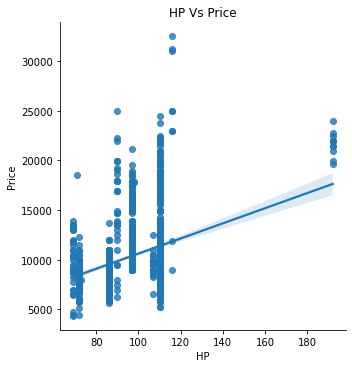

In [64]:
sns.lmplot( x = 'HP' , y = 'Price' ,data = toyota1)
plt.title('HP Vs Price')
plt.show()

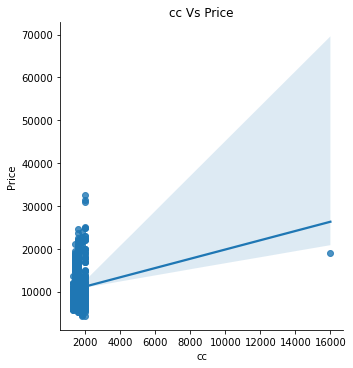

In [65]:
sns.lmplot( x = 'cc' , y = 'Price' ,data = toyota1)
plt.title('cc Vs Price')
plt.show()

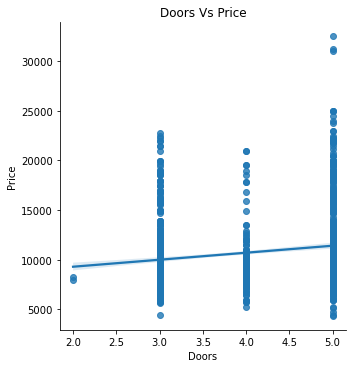

In [66]:
sns.lmplot( x = 'Doors' , y = 'Price' ,data = toyota1)
plt.title('Doors Vs Price')
plt.show()

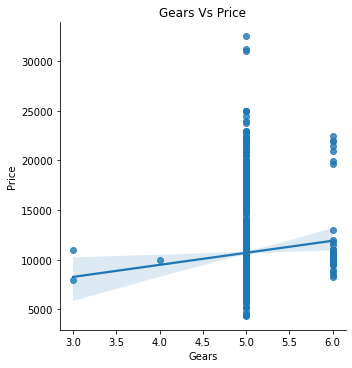

In [67]:
sns.lmplot( x = 'Gears' , y = 'Price' ,data = toyota1)
plt.title('Gears Vs Price')
plt.show()

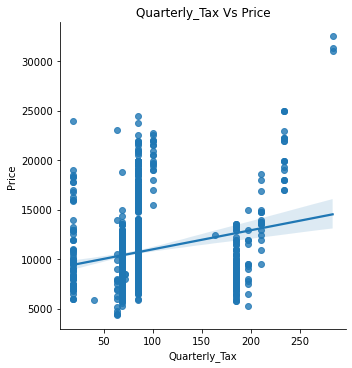

In [68]:
sns.lmplot( x = 'Quarterly_Tax' , y = 'Price' ,data = toyota1)
plt.title('Quarterly_Tax Vs Price')
plt.show()

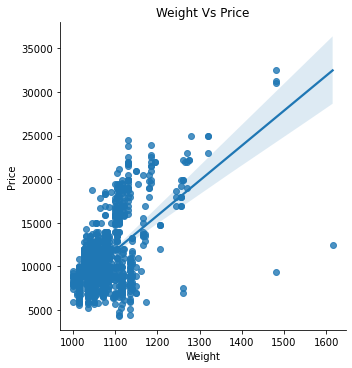

In [69]:
sns.lmplot( x = 'Weight' , y = 'Price' ,data = toyota1)
plt.title('Weight Vs Price')
plt.show()

## Normality test

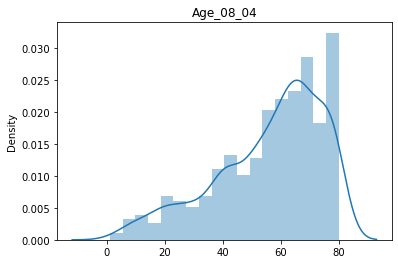

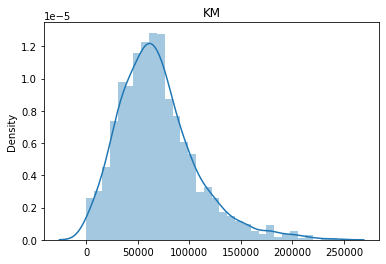

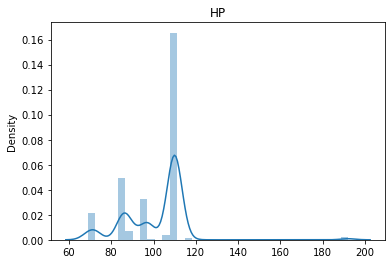

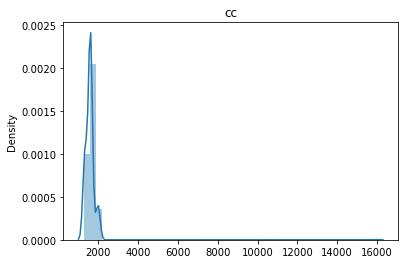

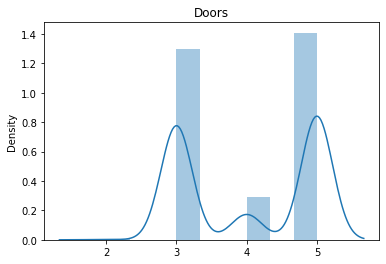

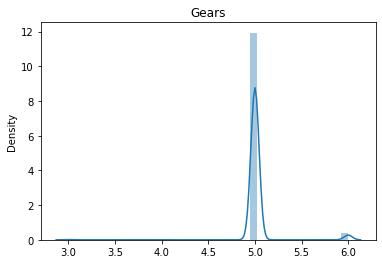

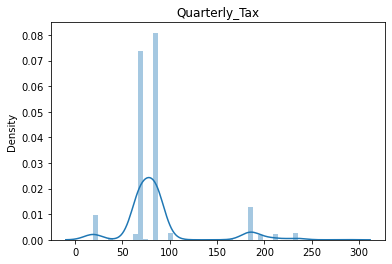

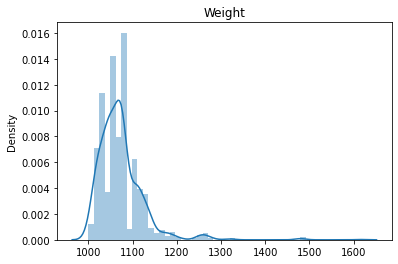

In [70]:
sns.distplot(x = toyota1['Age_08_04'])
plt.title('Age_08_04')
plt.show()
sns.distplot(x = toyota1['KM'])
plt.title('KM')
plt.show()
sns.distplot(x = toyota1['HP'])
plt.title('HP')
plt.show()
sns.distplot(x = toyota1['cc'])
plt.title('cc')
plt.show()
sns.distplot(x = toyota1['Doors'])
plt.title('Doors')
plt.show()
sns.distplot(x = toyota1['Gears'])
plt.title('Gears')
plt.show()
sns.distplot(x = toyota1['Quarterly_Tax'])
plt.title('Quarterly_Tax')
plt.show()
sns.distplot(x = toyota1['Weight'])
plt.title('Weight')
plt.show()

## Using probplot

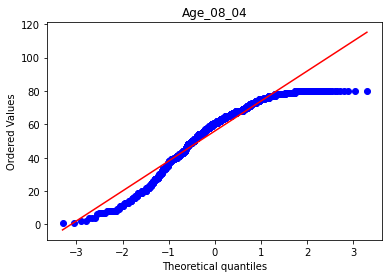

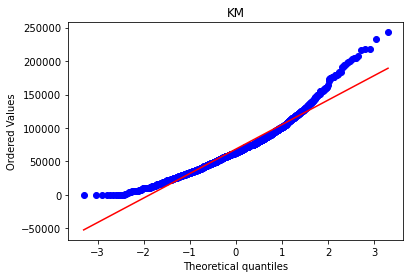

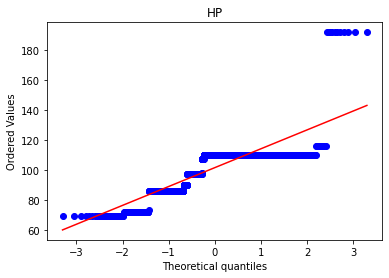

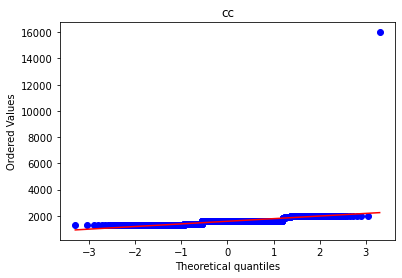

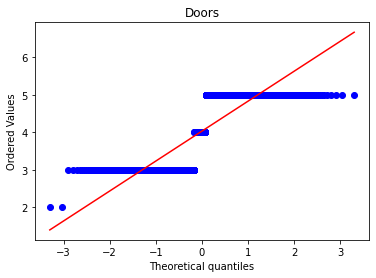

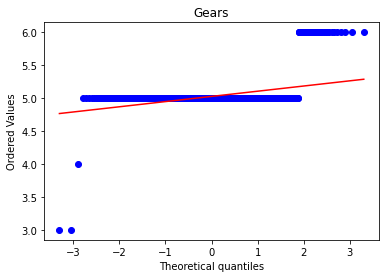

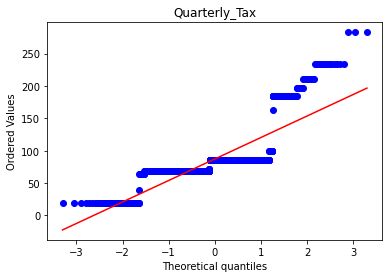

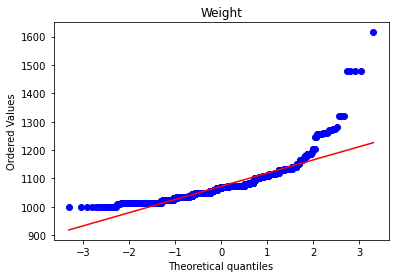

In [71]:
stats.probplot(x = toyota1['Age_08_04'] , dist = 'norm' , plot = plt)
plt.title('Age_08_04')
plt.show()
stats.probplot(x = toyota1['KM'] , dist = 'norm' , plot = plt)
plt.title('KM')
plt.show()
stats.probplot(x = toyota1['HP'] , dist = 'norm' , plot = plt)
plt.title('HP')
plt.show()
stats.probplot(x = toyota1['cc'] , dist = 'norm' , plot = plt)
plt.title('cc')
plt.show()
stats.probplot(x = toyota1['Doors'] , dist = 'norm' , plot = plt)
plt.title('Doors')
plt.show()
stats.probplot(x = toyota1['Gears'] , dist = 'norm' , plot = plt)
plt.title('Gears')
plt.show()
stats.probplot(x = toyota1['Quarterly_Tax'] , dist = 'norm' , plot = plt)
plt.title('Quarterly_Tax')
plt.show()
stats.probplot(x = toyota1['Weight'] , dist = 'norm' , plot = plt)
plt.title('Weight')
plt.show()

In [72]:
toyota1['Age_08_04'].skew()

-0.82670187309842

In [73]:
toyota1['KM'].skew()

1.0159121980877577

In [74]:
toyota1['HP'].skew()

0.9558356472519488

In [75]:
toyota1['cc'].skew()

27.431792795981686

In [76]:
toyota1['Doors'].skew()

-0.07639499290452467

In [77]:
toyota1['Gears'].skew()

2.283959738160194

In [78]:
toyota1['Quarterly_Tax'].skew()

1.993833864547599

In [79]:
toyota1['Weight'].skew()

3.108639394626062

# Test of multicollinearity

## Correlation matrix

In [80]:
corr_matrix = toyota1.corr()
corr_matrix

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


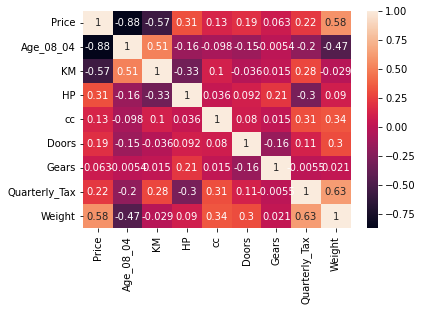

In [81]:
sns.heatmap(data= corr_matrix , annot = True )
plt.show()

### This test is a fail

# No Auto Regession - Passed

# Model building

In [82]:
x = toyota1.drop(labels=['Price'],axis =1)
y = toyota1[['Price']]

In [83]:
x

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [84]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [85]:
x.mean()

Age_08_04           55.947075
KM               68533.259749
HP                 101.502089
cc                1576.855850
Doors                4.033426
Gears                5.026462
Quarterly_Tax       87.122563
Weight            1072.459610
dtype: float64

In [86]:
x.std()

Age_08_04           18.599988
KM               37506.448872
HP                  14.981080
cc                 424.386770
Doors                0.952677
Gears                0.188510
Quarterly_Tax       41.128611
Weight              52.641120
dtype: float64

In [87]:
 x.shape,y.shape

((1436, 8), (1436, 1))

In [88]:
toyota2 = smf.ols(formula= 'y~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight' , data=toyota1).fit()

In [89]:
y_pred=toyota2.predict(x)

In [90]:
y_pred

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [91]:
toyota2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:19:14   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""